# **Regresión Lineal con Datos Reales:**
### **Temperatura de la Tierra a lo largo del tiempo**

¿Está aumentando la temperatura global? ¿Cuánto? ¡Esta es una pregunta de suma importancia en el mundo actual!

Los datos sobre la temperatura global están disponibles en varias fuentes:

- La NASA
- El Centro Nacional de Datos Climáticos (NCDC)
- La Universidad de East Anglia en el Reino Unido.
- Corporación Universitaria para la Investigación Atmosférica (UCAR).

El Centro de Vuelo Espacial Goddard de la NASA es una de nuestras fuentes de datos climáticos globales. Produjeron el video a continuación, que muestra un mapa a color de las anomalías cambiantes de la temperatura superficial global entre 1880 y 2015.


In [8]:
from IPython.display import HTML
HTML("""
<iframe width="900" height="600"
src="https://www.youtube.com/embed/gGOzHVUQCw0"
frameborder="0" allowfullscreen>
</iframe>
""")


El término anomalía de la temperatura global se refiere a la diferencia de temperatura con respecto a un valor de referencia o un promedio a largo plazo. Es una forma muy útil de analizar el problema y, en muchos sentidos, mejor que la temperatura absoluta. Por ejemplo, un mes de invierno puede ser más frío que el promedio en Washington D. C. y también en Miami, pero las temperaturas absolutas serán diferentes en ambos lugares.


¿Cómo abordarías la comprensión de las tendencias a partir de los datos sobre la temperatura global?

In [9]:
import numpy as np 
import matplotlib as matplot
import pandas as pd 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [10]:
import pandas as pd

url = "https://d2pn8kiwq2w21t.cloudfront.net/documents/global_monthly_temp_anomalies_1880-2016.txt"

# Leer el archivo desde la fila 4.
df = pd.read_csv(
    url,
    sep=r'\s+',
    skiprows=4,
    names=["Year", "Value"]
)

df.head()

,Year,Value
0,188001,0.0009
1,188002,-0.1229
2,188003,-0.1357
3,188004,-0.0499
4,188005,-0.0738


LinearRegression coef: [6.82013335e-05]
LinearRegression intercept: -13.237265685890032
SGDRegressor coef: [7.74769412e+13]
SGDRegressor intercept: [1.10868209e+10]


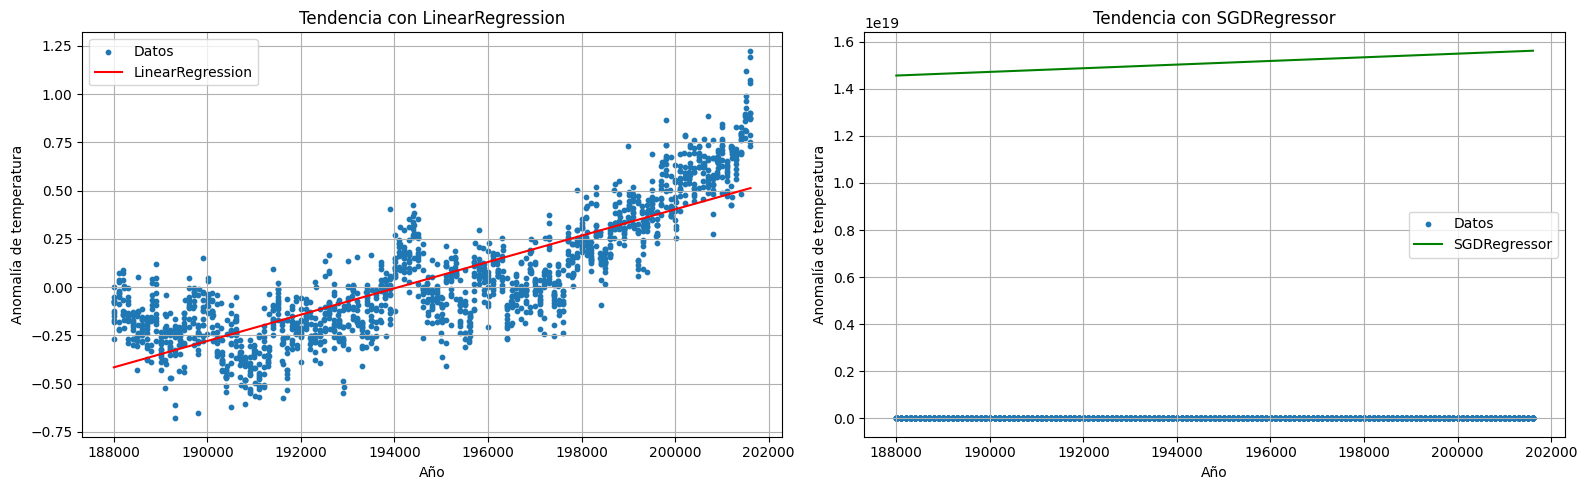

In [11]:
"""
df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Value'], errors='coerce').notnull()]
df['Year'] = df['Year'].astype(float)
df['Value'] = df['Value'].astype(float)
"""

X = df[['Year']]
y = df['Value']

modelo = LinearRegression()
modelo.fit(X, y)
print("LinearRegression coef:", modelo.coef_)
print("LinearRegression intercept:", modelo.intercept_)

modeloSGD = SGDRegressor(max_iter=1000, tol=1e-3)
modeloSGD.fit(X, y)
print("SGDRegressor coef:", modeloSGD.coef_)
print("SGDRegressor intercept:", modeloSGD.intercept_)

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=10, label='Datos')
plt.plot(X, modelo.predict(X), color='red', label='LinearRegression')
plt.xlabel('Año')
plt.ylabel('Anomalía de temperatura')
plt.title('Tendencia con LinearRegression')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, s=10, label='Datos')
plt.plot(X, modeloSGD.predict(X), color='green', label='SGDRegressor')
plt.xlabel('Año')
plt.ylabel('Anomalía de temperatura')
plt.title('Tendencia con SGDRegressor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

SGDRegressor (sin escalar):
Coeficiente: -37027735679377.016
Intercepto: -5543594788.173315
R2: -4.893924330627845e+38

SGDRegressor (escalado):
Coeficiente: 0.2691316222431809
Intercepto: 0.050019980823479505
R2: 0.6839572136067136


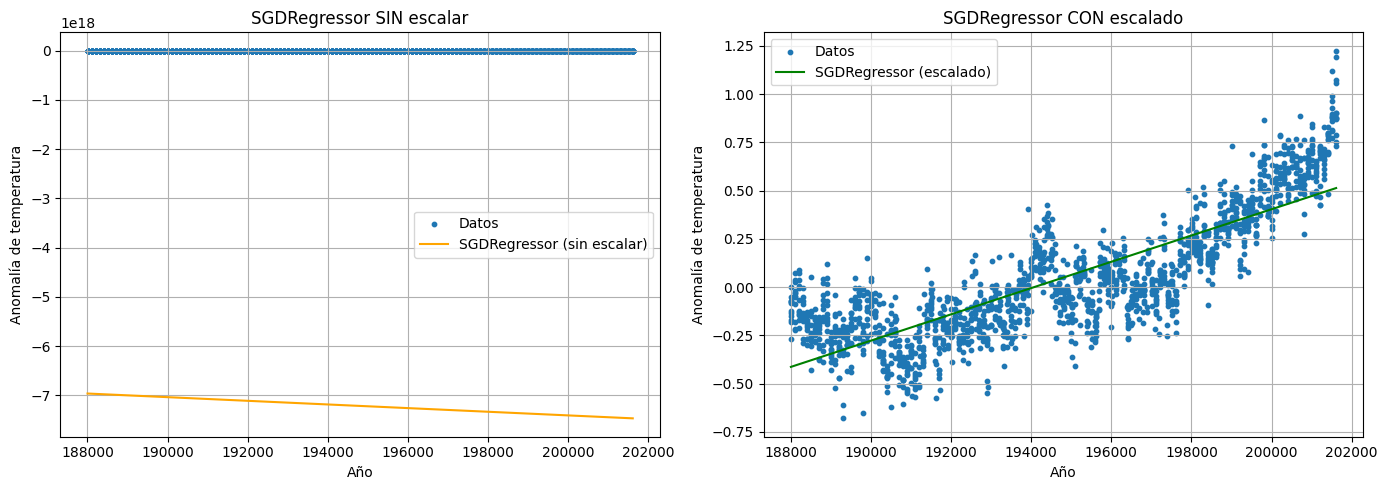

In [13]:
modeloSGD_no_scaler = SGDRegressor(max_iter=1000, tol=1e-3)
modeloSGD_no_scaler.fit(X, y)
y_pred_no_scaler = modeloSGD_no_scaler.predict(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
modeloSGD_scaler = SGDRegressor(max_iter=1000, tol=1e-3)
modeloSGD_scaler.fit(X_scaled, y)
y_pred_scaler = modeloSGD_scaler.predict(X_scaled)


print("SGDRegressor (sin escalar):")
print("Coeficiente:", modeloSGD_no_scaler.coef_[0])
print("Intercepto:", modeloSGD_no_scaler.intercept_[0])
print("R2:", r2_score(y, y_pred_no_scaler))

print("\nSGDRegressor (escalado):")
print("Coeficiente:", modeloSGD_scaler.coef_[0])
print("Intercepto:", modeloSGD_scaler.intercept_[0])
print("R2:", r2_score(y, y_pred_scaler))

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, s=10, label='Datos')
plt.plot(X, y_pred_no_scaler, color='orange', label='SGDRegressor (sin escalar)')
plt.xlabel('Año')
plt.ylabel('Anomalía de temperatura')
plt.title('SGDRegressor SIN escalar')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, s=10, label='Datos')
plt.plot(X, y_pred_scaler, color='green', label='SGDRegressor (escalado)')
plt.xlabel('Año')
plt.ylabel('Anomalía de temperatura')
plt.title('SGDRegressor CON escalado')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- La temperatura global muestra una tenddencia creciente a lo largo del tiempo
- El escalado es importante para el SGD, puesto que normaliza las variables (media 0 y desviación 1 en StandardScaler). Esto porque el método SGD es sensible a la magnitud de las variables y el modelo puede ser inestable por las mismas.
- En 1940 se observa un pico notorio en los datos de temperatura. Esto puede deberse a cambios climáticos por acción humana como la  quema de fósiles en la segunda guerra mundial, o quizá un cambio en la medida de registros. Averiguando en internet realmente dice lo contrario, que la temperatura bajó por un aumento de aerosoles en la atmosfera, puesto que las particulas pequeñas en el aire reflejaban la luz solar. 
- Es importante conocer el contexto de la medida de los datos para analizar con cuidado ya que puede deberse a factores externos o cambios en las medidas. 